**importing packages**

In [ ]:
from google.colab import output
import pandas as pd
import nltk.data
import sys  
import regex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install contractions
import contractions
nltk.download('punkt')
output.clear()

In [ ]:
df = pd.read_csv('hp_db (1).csv')

In [ ]:
bool_series = pd.notnull(df['types']) 
df=df[bool_series] 

####**creating additional columns needed for visualization**

In [ ]:
def preprocess_for_visual(df):
  ''' 
  The function's purpose: to create additional 3 columns 
  1. full_without_contractions -> open contractions (didn't => did not), ('s => is), etc.
  2. tokenized_text -> separate words of that sentences
  3. length -> count those words
  '''
  df['full_without_contractions']=df.apply(lambda row: contractions.fix(row['text']), axis=1)    #(didn't => did not) so on
  df['tokenized_text'] = df.apply(lambda row: regex.sub(r"[^a-zA-Z0-9]+"," ",row['full_without_contractions']), axis=1) #remove special characters
  df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['tokenized_text']), axis=1) #tokenize sentence to words
  df['length'] = df.apply(lambda row: len(row['tokenized_text']), axis=1) #count words
  return df

In [ ]:
df=preprocess_for_visual(df)

In [ ]:
df

,Unnamed: 0,character,text,number,types,full_without_contractions,tokenized_text,length
0,0,DUMBLEDORE,I should have known that you would be here......,1,male,I should have known that you would be here......,"[I, should, have, known, that, you, would, be,...",11
1,1,DUMBLEDORE,"I'm afraid so, Professor. The good, and the bad.",1,male,"I am afraid so, Professor. The good, and the ...","[I, am, afraid, so, Professor, The, good, and,...",10
2,2,DUMBLEDORE,Hagrid is bringing him.,1,male,Hagrid is bringing him.,"[Hagrid, is, bringing, him]",4
3,3,DUMBLEDORE,"No problems, I trust, Hagrid?",1,male,"No problems, I trust, Hagrid?","[No, problems, I, trust, Hagrid]",5
4,4,DUMBLEDORE,The only family he has.,1,male,The only family he has.,"[The, only, family, he, has]",5
...,...,...,...,...,...,...,...,...
6647,6650,DUMBLEDORE,"I’ve never put much stock in miracles, Harry....",8,male,"I have never put much stock in miracles, Harr...","[I, have, never, put, much, stock, in, miracle...",25
6648,6651,DUMBLEDORE,Luck.,8,male,Luck.,[Luck],1
6649,6652,DUMBLEDORE,"Do not pity the dead, Harry. Pity the living...",8,male,"Do not pity the dead, Harry. Pity the living...","[Do, not, pity, the, dead, Harry, Pity, the, l...",17
6650,6653,DUMBLEDORE,"Actually, if I think about it... it doesn’t s...",8,male,"Actually, if I think about it... it does not ...","[Actually, if, I, think, about, it, it, does, ...",19


In [ ]:
def new_df_total_words(df):
  '''
  The function's purpose: to create an additional dataframe to create a visualization  'Who talks the most?
  The df consists of     3        or       4 (if the movie is a sequel-> has parts)
  columns: ['character','types', 'total'] or ['character','types','number', 'total']
  '''
  characters=list(df['character'].unique())
  if 'number' in df.columns:
    numbers=list(df['number'].unique())
    df_total_words=pd.DataFrame(columns =  ['character','types','number', 'total'])
    for i in range(len(characters)):
      for number in numbers:
        row={'character':characters[i],'types':''.join(df.loc[df['character'] == characters[i],'types'].unique()),'number':number,'total': df.loc[(df['character'] == characters[i])&(df['number']==number), 'length'].sum()}
        df_total_words=df_total_words.append(row, ignore_index=True)
  else:
    df_total_words=pd.DataFrame(columns =  ['character', 'total'])
    for i in range(len(characters)):
      row={'character':characters[i],'types':''.join(df.loc[df['character'] == characters[i],'types'].unique()),'total': df.loc[df['character'] == characters[i], 'length'].sum()}
      df_total_words=df_total_words.append(row, ignore_index=True)
  return df_total_words

In [ ]:
(new_df_total_words(df))

,character,types,number,total
0,DUMBLEDORE,male,1,825
1,DUMBLEDORE,male,2,890
2,DUMBLEDORE,male,3,592
3,DUMBLEDORE,male,4,1480
4,DUMBLEDORE,male,5,2334
...,...,...,...,...
459,ABERFORTH,male,4,0
460,ABERFORTH,male,5,0
461,ABERFORTH,male,6,0
462,ABERFORTH,male,7,0


####**Visualization #1 -Who talks the most? - BOTH FOR SEQUEL & SEPARATE MOVIE**

In [ ]:
def visual_talks_most(df,number):
  '''
  The function's purpose: to create a visualization of 'Who talks the most?
  '''
  df=df.sort_values('total', ascending=False)  
  sns.set_style('whitegrid')
  plt.figure(figsize=(15,8))
  plt.title('Who talks the most '+number,fontweight='bold',fontsize=18, color='black',style='italic',loc='center',pad=5)
  sns.set_color_codes("pastel")
  sns.barplot(x='total', y='character', data=df[:10], palette = 'rocket')  #OR data=df[:10] if we need top 10 characters
  sns.despine(left=True, bottom=True)
  plt.tight_layout()
  plt.grid()
  plt.show()

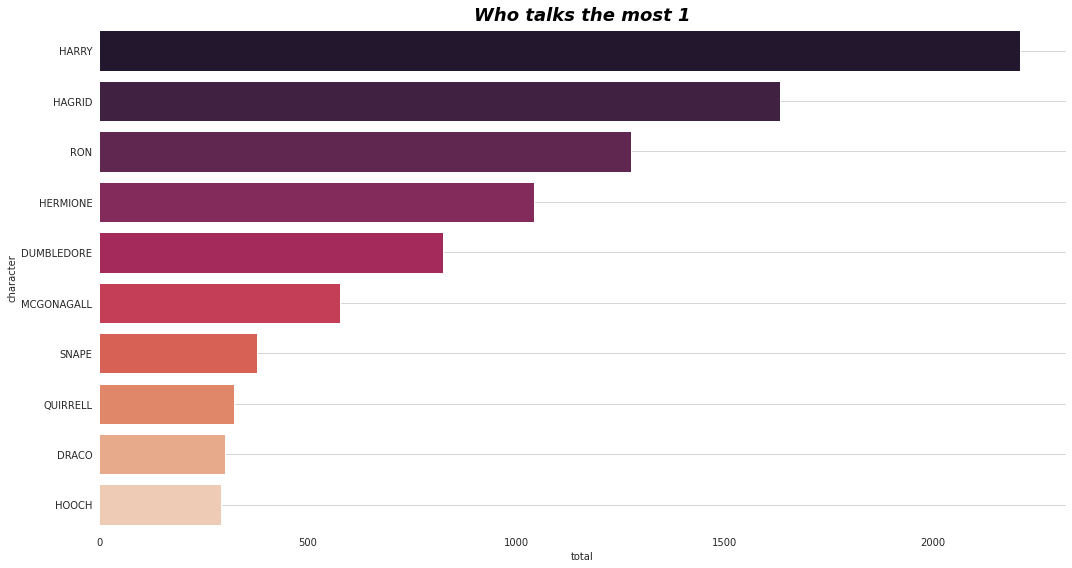

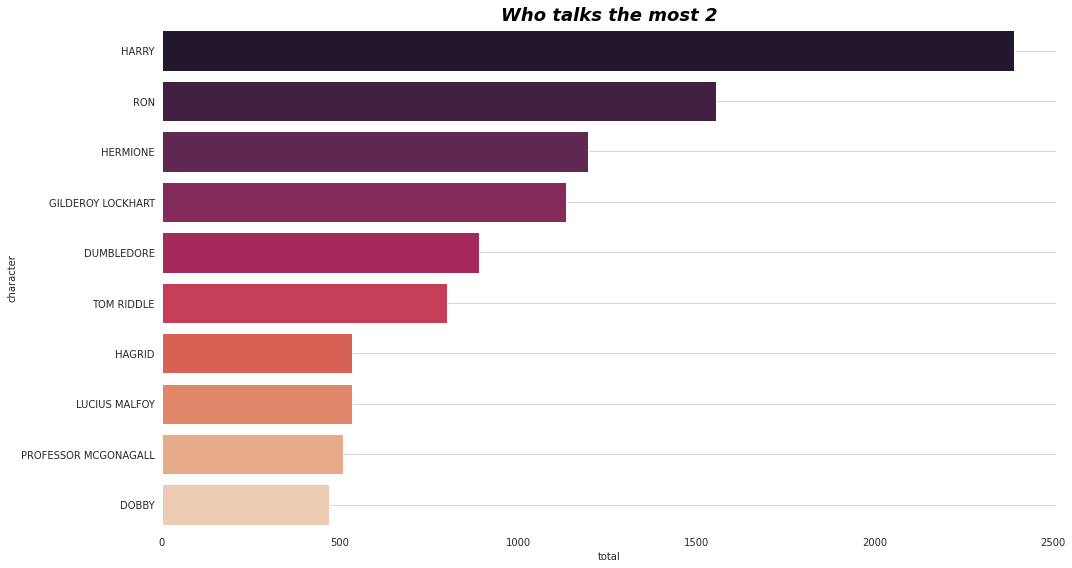

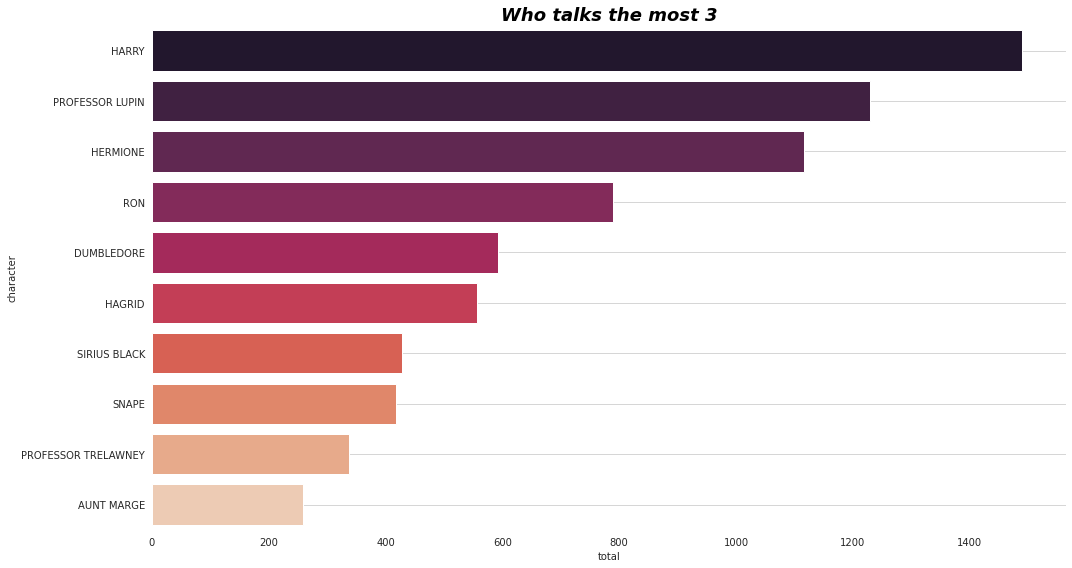

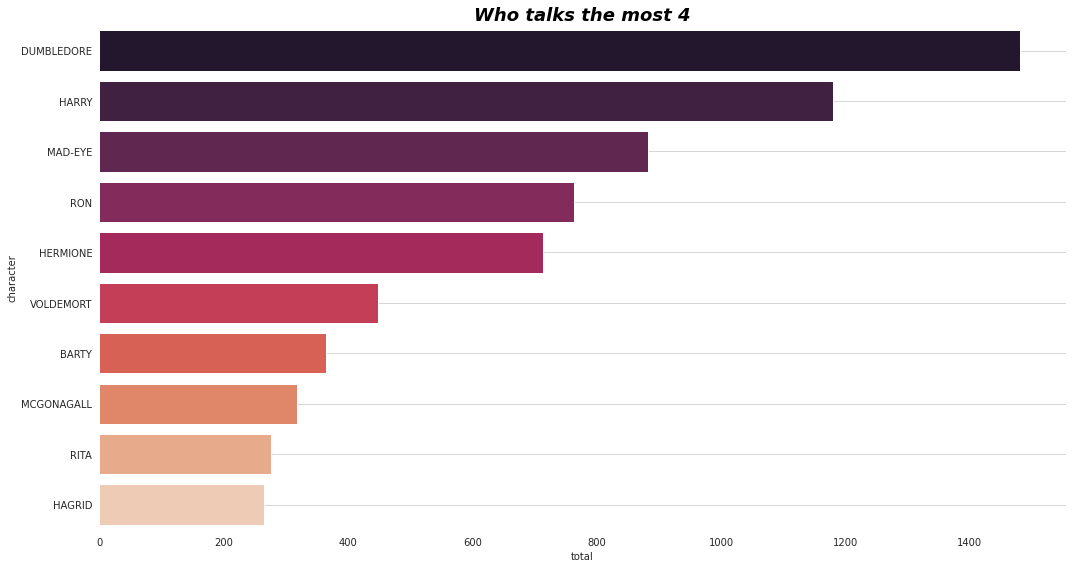

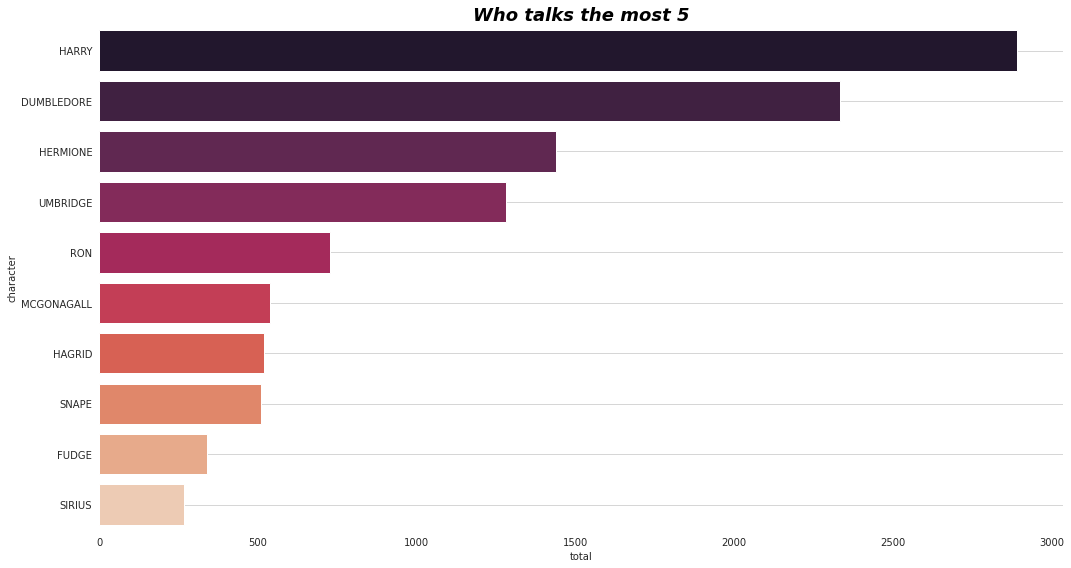

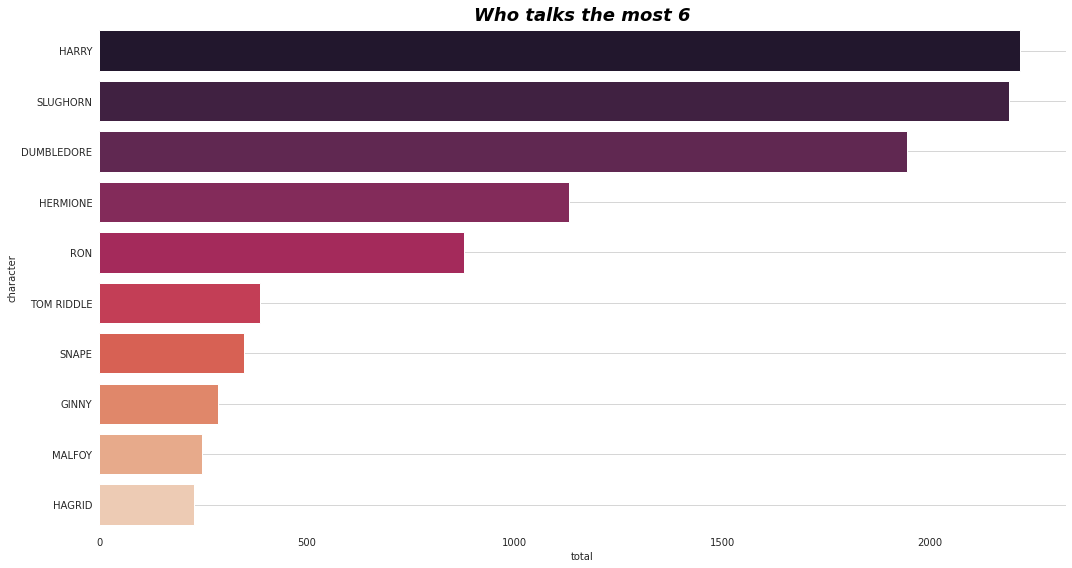

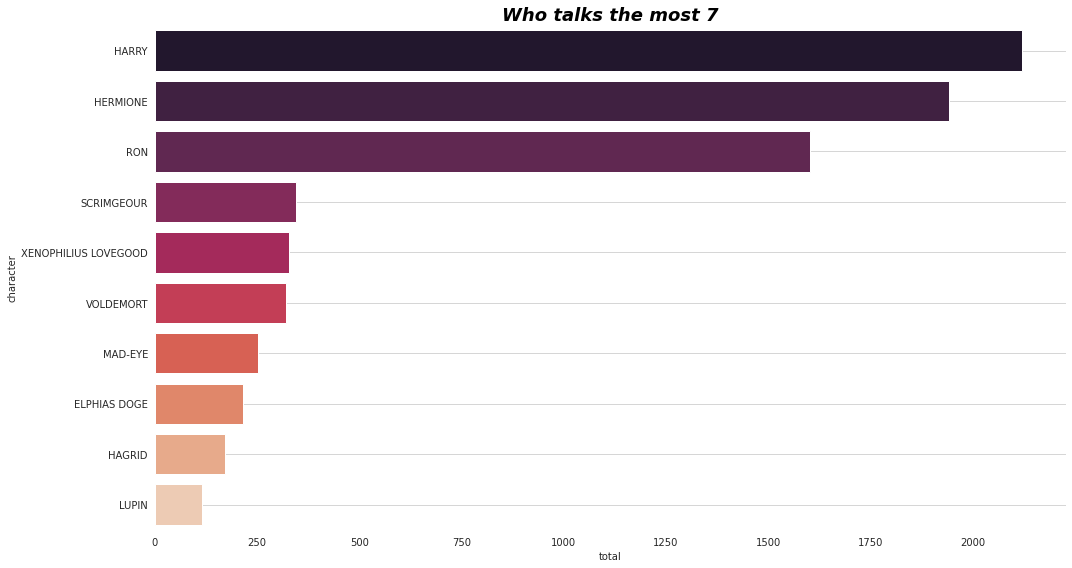

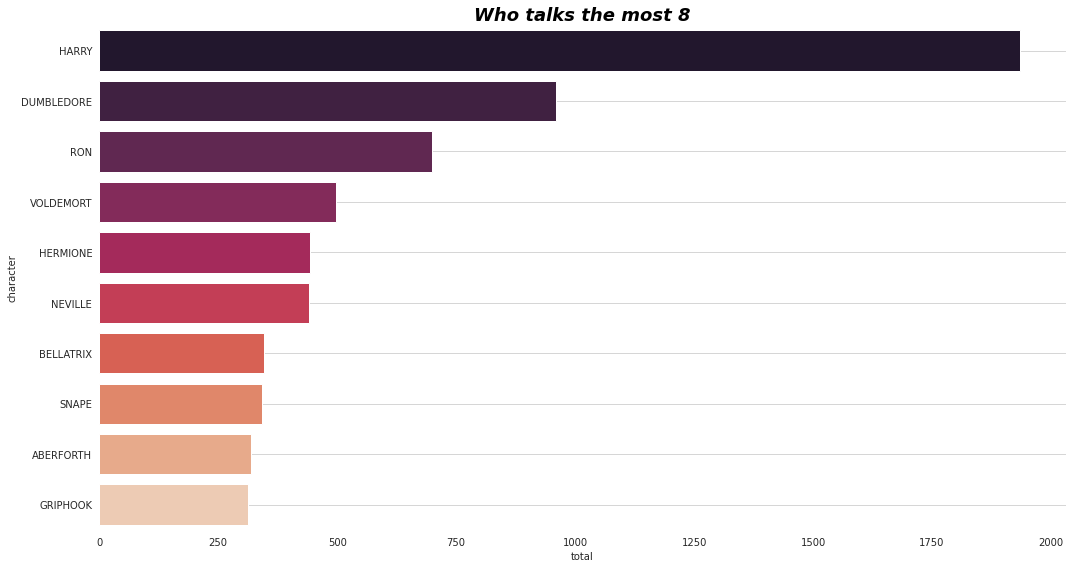

In [ ]:
if 'number' in new_df_total_words(df).columns:
  numbers=list(df['number'].unique())
  for i in range(len(numbers)):
    visual_talks_most(new_df_total_words(df).loc[new_df_total_words(df)['number']==i+1],str(i+1))
else:
  visual_talks_most(new_df_total_words(df),'?')

####**Visualization #2 -Male/Female Presence -> BOTH FOR SEQUEL & SEPARATE MOVIE**

In [ ]:
df_new=new_df_total_words(df)
MaleDataFrame = df_new[df_new['types'] == 'male']
FemaleDataFrame = df_new[df_new['types'] == 'female']
male_presence=[]
female_presence=[]
if 'number' in new_df_total_words(df).columns:
  for i in range(len(new_df_total_words(df)['number'].unique())):
    male_presence.append(MaleDataFrame.loc[MaleDataFrame['number'] == i+1, 'total'].sum())
    female_presence.append(FemaleDataFrame.loc[FemaleDataFrame['number'] == i+1, 'total'].sum())
else:
  male_presence.append(MaleDataFrame['total'].sum())
  female_presence.append(FemaleDataFrame['total'].sum())

In [ ]:
def visual_presence_movie(male_presence,female_presence):
  '''
  The function's purpose: visualize Male/Female presence in MOVIE
  Have to call this function if it is MOVIE
  '''
  x_indexes=np.arange(1)
  plt.title('Male and Female Presence',fontweight='bold',fontsize=18, color='black',style='italic',loc='center',pad=5)
  plt.xticks(ticks=x_indexes)
  plt.bar(x_indexes,male_presence,width=0.2,color='#4C78A8',label='male')
  plt.bar(x_indexes+0.2,female_presence,width=0.2,color='#F58518',label='female')
  plt.legend()

In [ ]:
def visual_presence_sequel(male_presence,female_presence):
  '''
  The function's purpose: visualize Male/Female presence in SEQUEL
  Have to call this function if it is SEQUEL (series)
  '''
  x_indexes=np.arange(len(new_df_total_words(df)['number'].unique()))
  width=0.4
  plt.figure(figsize=(14,7))
  sns.set_style('whitegrid')
  plt.bar(x_indexes,male_presence,width=width,color='#4C78A8',label='male')
  plt.bar(x_indexes+width,female_presence,width=width,color='#F58518',label='female')
  plt.legend()
  plt.title('Male and Female Presence',fontweight='bold',fontsize=18, color='black',style='italic',loc='center',pad=5)
  plt.xlabel('Sequel')
  plt.show()

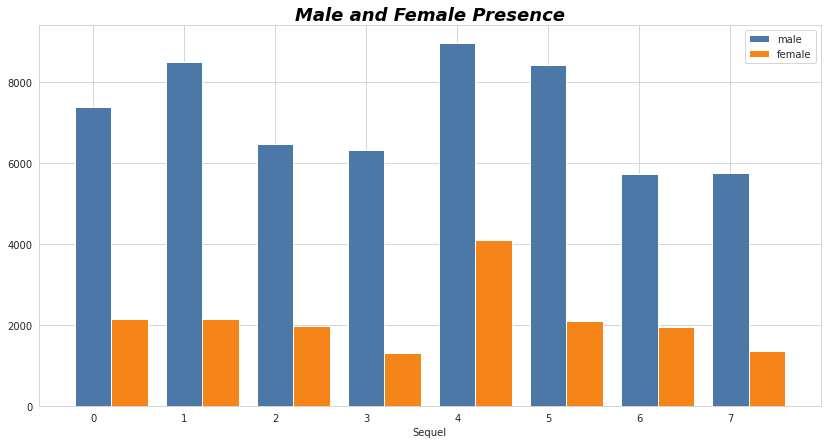

In [ ]:
visual_presence_sequel(male_presence,female_presence)